In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os

paths = []
labels = []

# Replace '/kaggle/input' with your local dataset directory
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        if filename.endswith('.wav'):  # Ensure only .wav files are processed
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
        if len(paths) == 2800:
            break

print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

5600

In [4]:
paths[:5]

['dataset/TESS Toronto emotional speech set data/YAF_sad/YAF_pick_sad.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_sad/YAF_kick_sad.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_sad/YAF_road_sad.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_sad/YAF_jar_sad.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_sad/YAF_hall_sad.wav']

In [5]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,dataset/TESS Toronto emotional speech set data...,sad
1,dataset/TESS Toronto emotional speech set data...,sad
2,dataset/TESS Toronto emotional speech set data...,sad
3,dataset/TESS Toronto emotional speech set data...,sad
4,dataset/TESS Toronto emotional speech set data...,sad


In [7]:
df['label'].value_counts()

label
sad        800
fear       800
angry      800
disgust    800
ps         800
happy      800
neutral    800
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

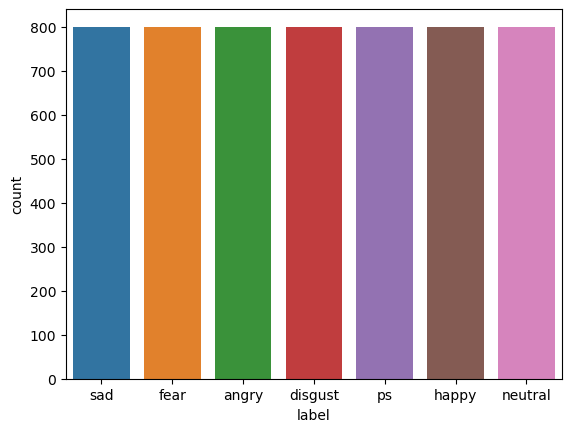

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

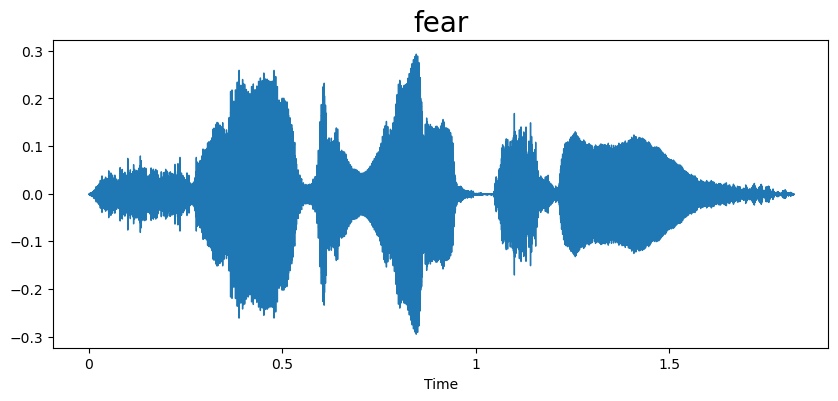

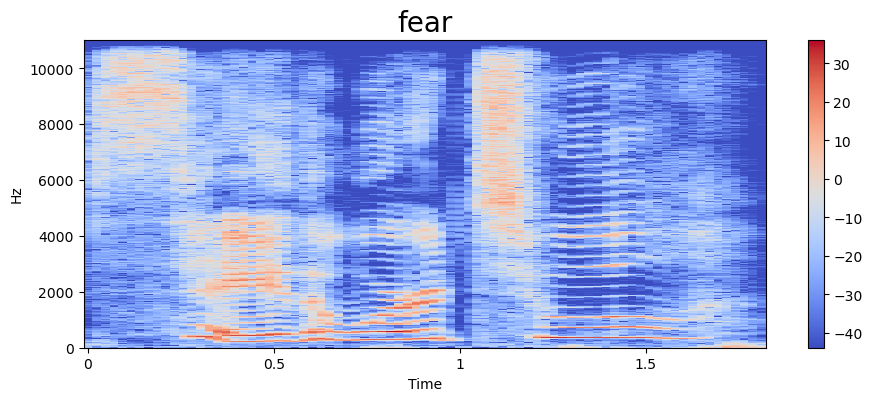

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

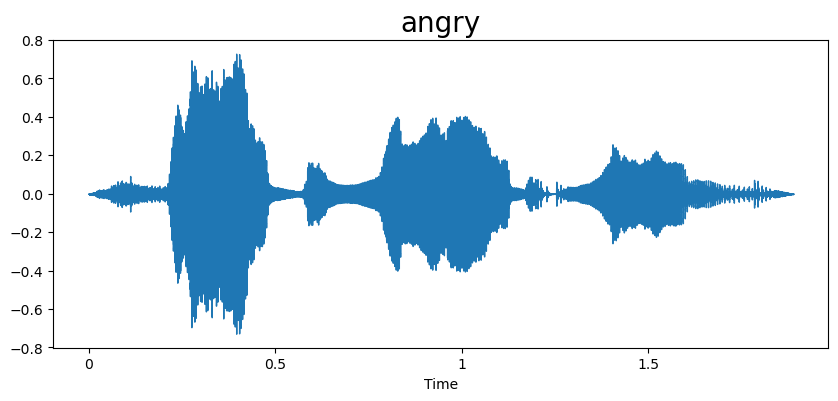

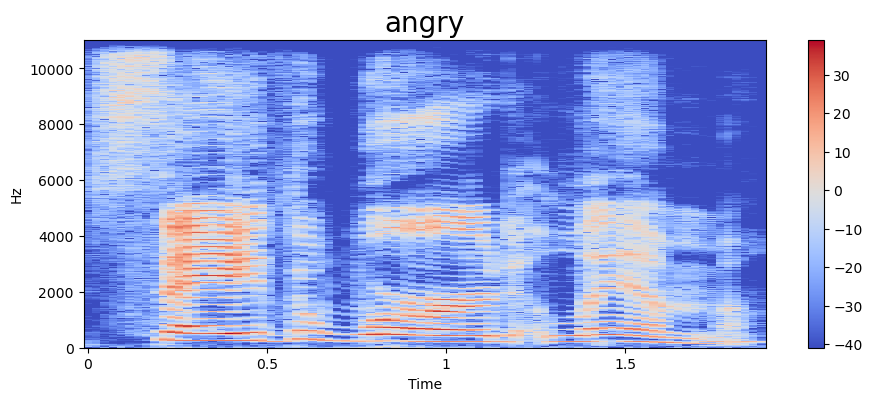

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

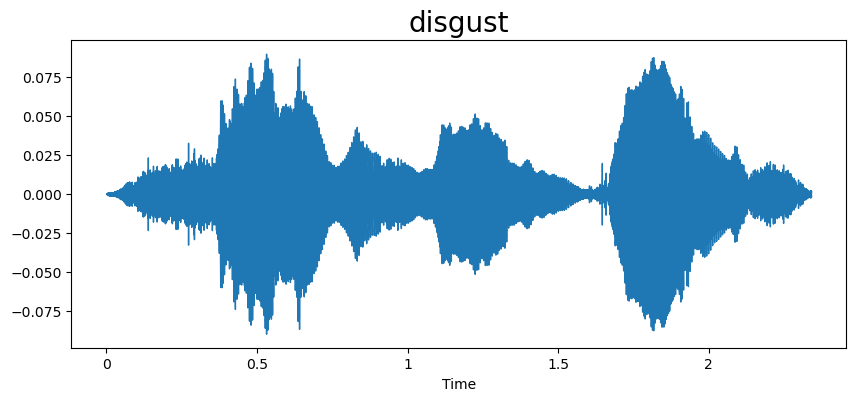

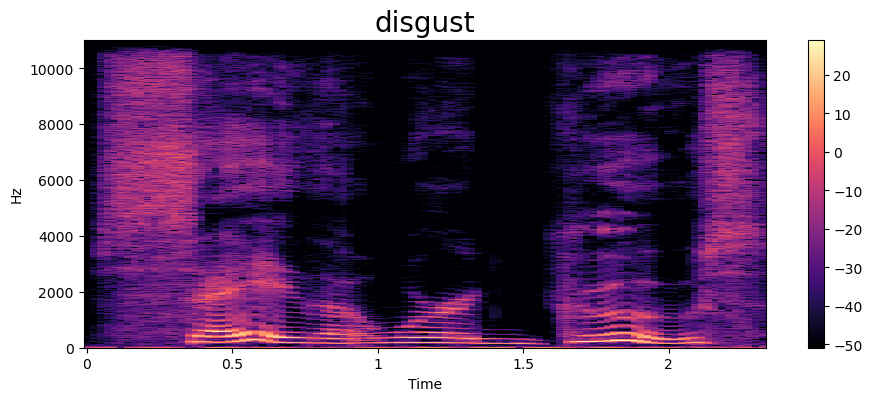

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

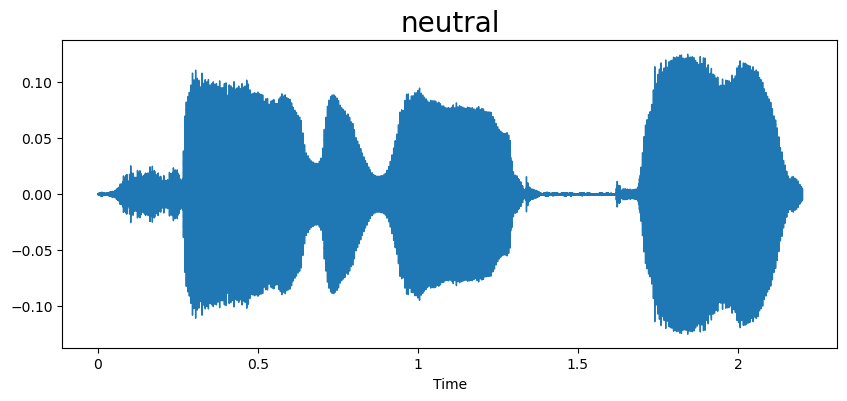

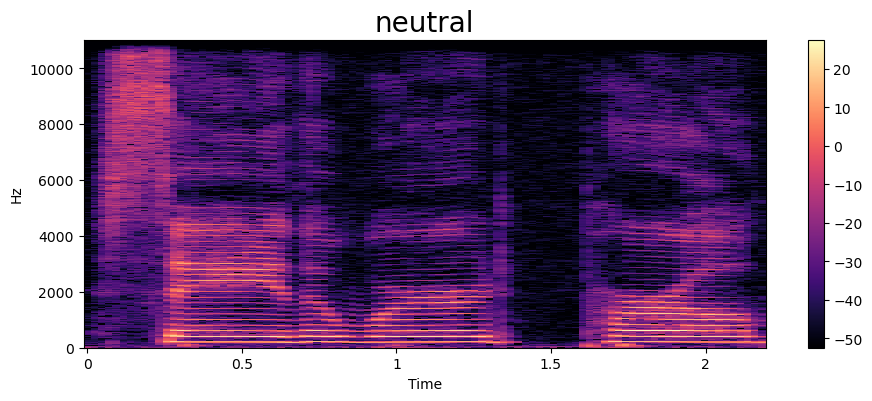

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

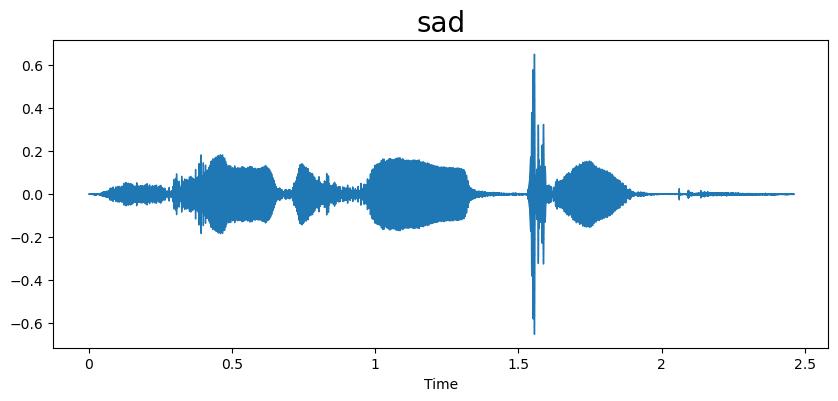

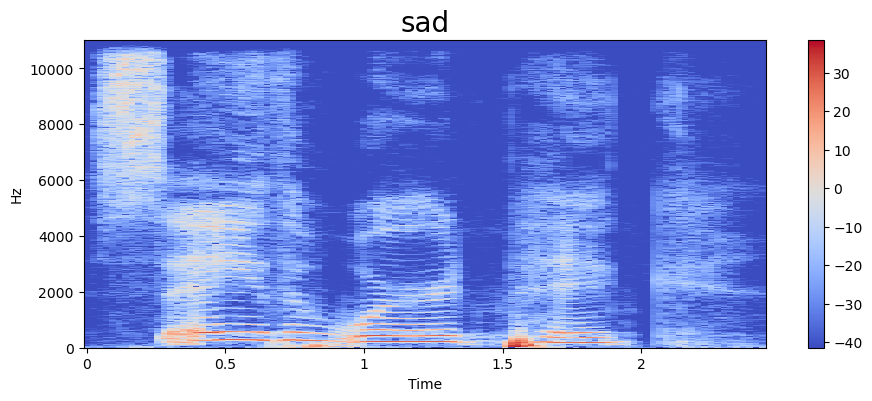

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

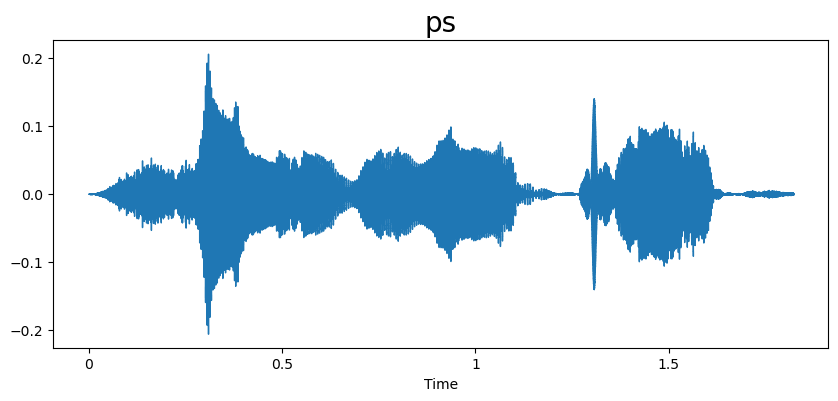

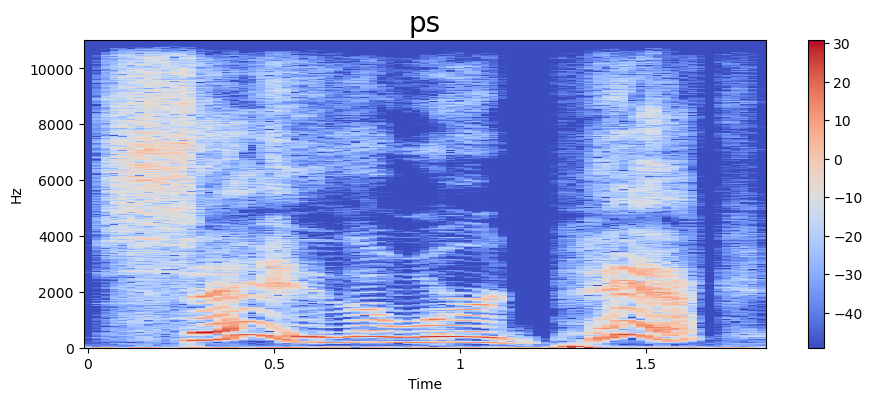

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

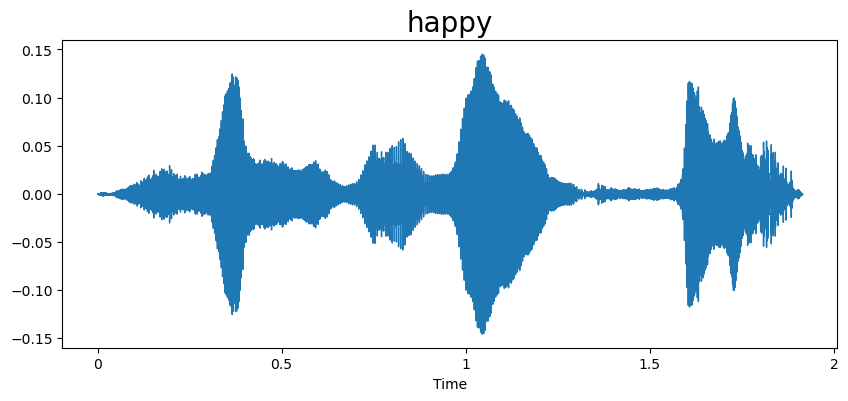

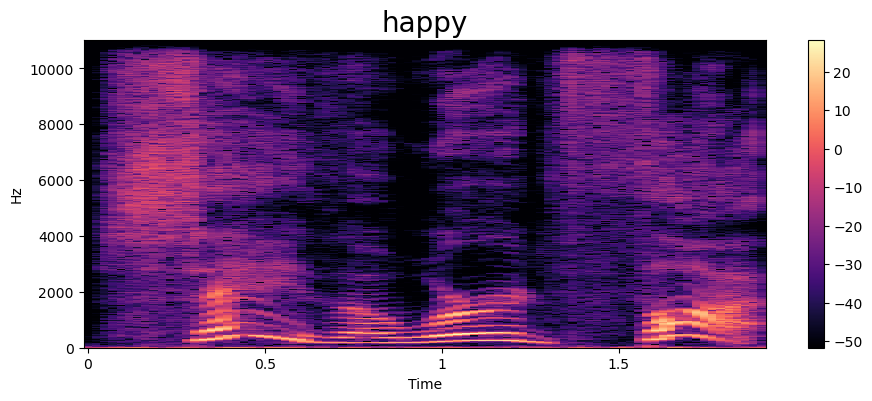

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-4.0976691e+02,  8.7749123e+01,  2.2847012e+01,  4.0431747e+01,
        9.7905273e+00,  3.7332246e+00, -2.7344184e+00, -8.9495554e+00,
        3.5624874e+00, -1.2005082e+01, -3.6908846e+00,  1.8095992e+00,
       -5.3735299e+00,  6.9867735e+00, -6.2379251e+00,  1.0952128e+00,
        7.6578659e-01, -2.4418123e+00, -7.9200463e+00, -5.9605379e+00,
       -7.1019883e+00, -7.7682948e+00, -3.6830564e+00,  4.1091146e+00,
       -3.0087498e-01,  5.9679031e+00,  2.0398079e-01, -6.6093755e-01,
       -2.6439133e+00, -2.0392258e-01,  3.6369934e+00,  9.6661215e+00,
        8.0118532e+00,  7.1307998e+00,  2.2150338e+00,  1.8789151e+00,
        2.0025277e+00,  1.9759331e+00,  4.3048563e+00,  3.0489488e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-409.7669, 87.74912, 22.847012, 40.431747, 9....
1       [-438.59506, 66.7165, 23.917074, 38.291676, 6....
2       [-432.72467, 107.85921, 25.550182, 30.242085, ...
3       [-345.25906, 94.46191, 11.120116, 24.519775, -...
4       [-395.94043, 111.45156, 27.71482, 14.070998, -...
                              ...                        
5595    [-374.46442, 88.345566, -8.879825, -18.313759,...
5596    [-437.882, 86.159096, -5.292689, -23.754158, -...
5597    [-428.6321, 100.859566, -27.002722, -40.025597...
5598    [-434.54526, 82.24351, 17.994448, -10.922421, ...
5599    [-468.8798, 63.885868, -2.7314255, -7.891333, ...
Name: speech, Length: 5600, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(5600, 7)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2024-07-17 22:08:57.690085: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 22:08:58.721701: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 22:08:59.469766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 22:09:00.003130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 22:09:00.129667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 22:09:01.247941: I tensorflow/core/platform/cpu_feature_gu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - accuracy: 0.5024 - loss: 1.3013 - val_accuracy: 0.8929 - val_loss: 0.2595
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 262ms/step - accuracy: 0.9158 - loss: 0.2639 - val_accuracy: 0.9321 - val_loss: 0.1905
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.9462 - loss: 0.1857 - val_accuracy: 0.9705 - val_loss: 0.0838
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.9632 - loss: 0.1241 - val_accuracy: 0.9205 - val_loss: 0.2495
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9632 - loss: 0.1145 - val_accuracy: 0.9464 - val_loss: 0.1530
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.9652 - loss: 0.1152 - val_accuracy: 0.9875 - val_loss: 0.0341
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.9761 - loss: 0.0700 - val_accuracy: 0.9821 - val_loss: 0.0540
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.9772 - loss: 0.0877 - val_accu

In [28]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

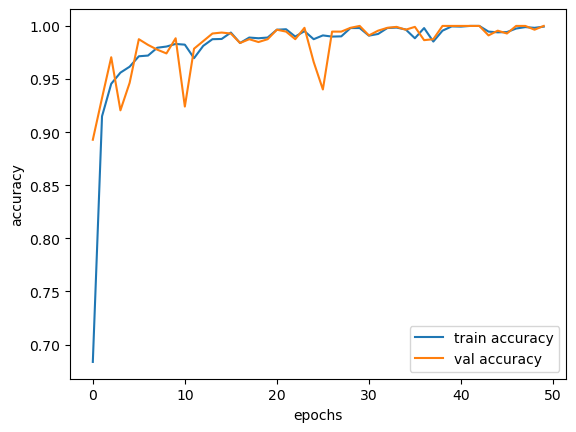

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

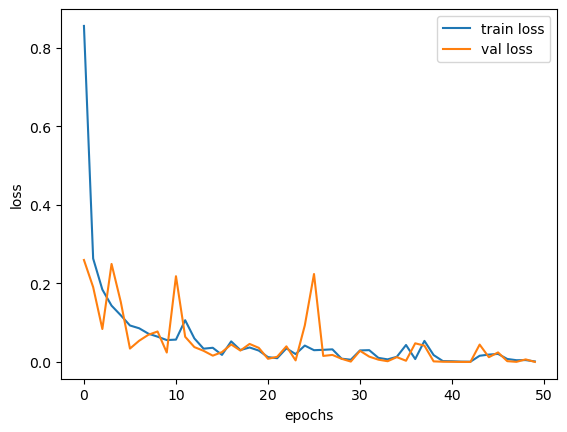

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()